<a href="https://colab.research.google.com/github/RaiShra1/Computer-Vision-and-Image-Processing/blob/main/Multiresolution_Blending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving apple.jpeg to apple.jpeg
Saving orange.jpeg to orange.jpeg


In [ ]:
!pip install ipdb

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import ipdb

In [6]:
def normalize(Img):
    return ((Img - np.amin(Img))/(np.amax(Img)-np.amin(Img)))

In [33]:
##########Generate Gaussian and Laplacian pyramids of an image ##########
def createPyramid(Img):
    # Create lists for Gaussian and Laplacian Pyramids
    G_pyr = []
    L_pyr = []
    # Determine length of pyramid when dividing dimension by 2 each level
    pyr_len = int(np.floor(np.log2(Img.shape[0]))-1)
    
    for i in range(0,pyr_len):
        # Normalize Image between 0 and 1 for plots
        I_norm = normalize(Img)
        # Append Gaussian pyramid list with Image
        G_pyr.append(Img)
        # Blur image
        I_blur = cv2.GaussianBlur(G_pyr[i], (5,5), 0)
        # Normalize between 0 and 1 for plots
        I_blur_norm = normalize(I_blur)
        # Find residual by subtracting Blur image from unblurred image
        L = G_pyr[i] - I_blur
        # Normalize between 0 and 1 for plots
        L_norm = normalize(L)
        # Append Laplacian with residual image
        L_pyr.append(L)
        # Downsample by factor of 2
        Img = cv2.resize(Img, (G_pyr[i].shape[1]//2,G_pyr[i].shape[0]//2))
        
        # Plot images
        # fig=plt.figure(figsize=(10,20))
        # plt.subplot(pyr_len, 3, 1 + i * 3)
        # plt.imshow(G_pyr[i])
        # plt.title('Gaussian Image ' + str(G_pyr[i].shape))
        # plt.subplot(pyr_len, 3, 2 + i * 3)
        # plt.imshow(I_blur)
        # plt.title('Image + Blur ' + str(I_blur.shape))
        # plt.subplot(pyr_len, 3, 3+ i * 3)
        # plt.imshow(normalize(L), 'gray')
        # plt.title('Laplacian Image ' + str(L_norm.shape))
    plt.show()
    return G_pyr, L_pyr

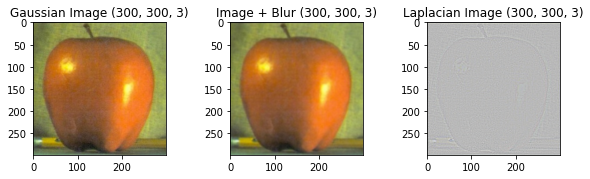

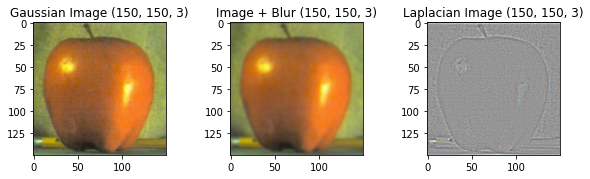

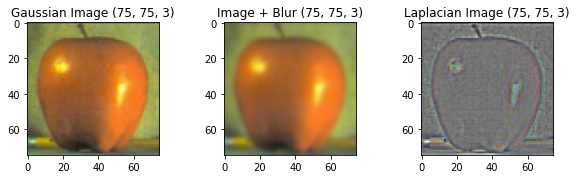

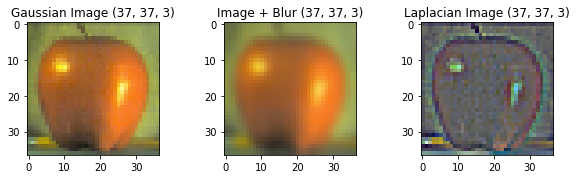

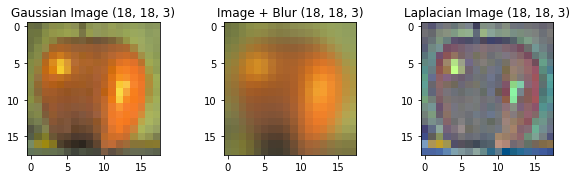

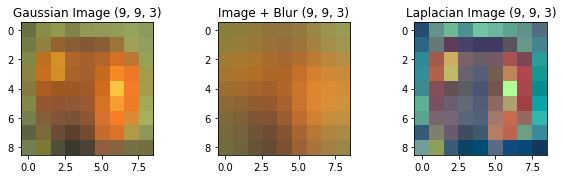

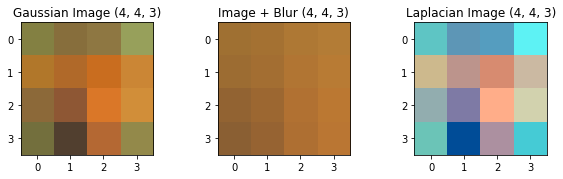

In [13]:
### Test image pyramid function
img = cv2.imread('apple.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB).astype('float64')
# Map range between 0 and 1
img = img / 255
# Create pyramids
G_pyr, L_pyr = createPyramid(img)

In [34]:
# Function Collapses back Pyramid to high res image
def collapsePyramid(G_pyr, L_pyr):
    #Create Up Pyramid list
    up_pyr = []
    # Select lowest resolution image in existing Gaussian to begin
    im = G_pyr[len(G_pyr)-1]
    for j in range(0, len(L_pyr)-1):
        # Upsample Gaussian image to shape of Laplacian in current level
        G_exp = cv2.resize(im, (L_pyr[len(L_pyr)-j-2].shape[0:2]))
        # Normalize to plot
        G_exp_norm =normalize(G_exp)
        # Choose Laplacian of current level
        L = L_pyr[len(L_pyr)-j-2]
        # Normalize to plot
        L_norm = normalize(L)
        # Add Laplacian to upsampled image to get Gaussian image @ current level
        im = G_exp + L
        # Normalize to plot
        im_norm = normalize(im)
        # Uppend Up Pyramid list with current Gaussian
        up_pyr.append(im)

        # Plot images
        # fig=plt.figure(figsize=(10, 20))
        # plt.subplot(len(L_pyr)-1, 3, 1 + j * 3)
        # plt.imshow(normalize(G_exp))
        # plt.title('Expanded Image ' + str(G_exp_norm.shape))
        # plt.subplot(len(L_pyr)-1, 3, 2 + j * 3)
        # plt.imshow(normalize(L))
        # plt.title('Laplacian Image ' + str(L_norm.shape))
        # plt.subplot(len(L_pyr)-1, 3, 3 + j * 3)
        # plt.imshow(normalize(im), 'gray')
        # plt.title('Gaussian Image ' + str(im_norm.shape))
    plt.show()
    return up_pyr

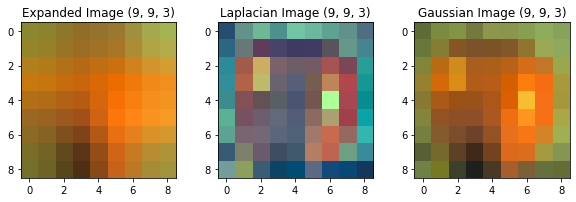

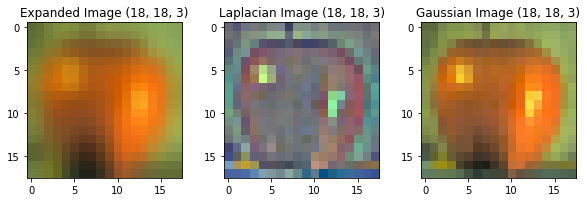

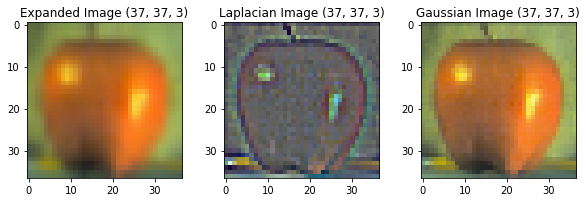

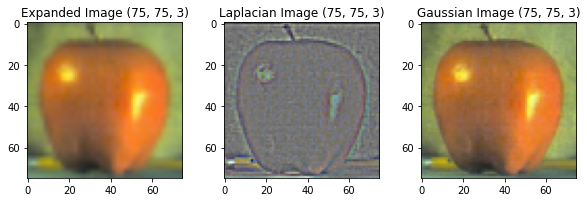

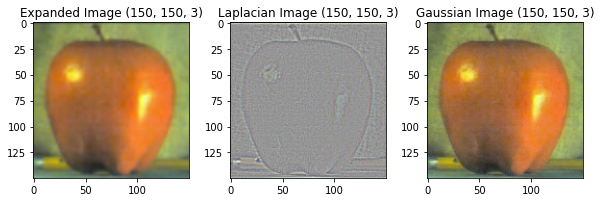

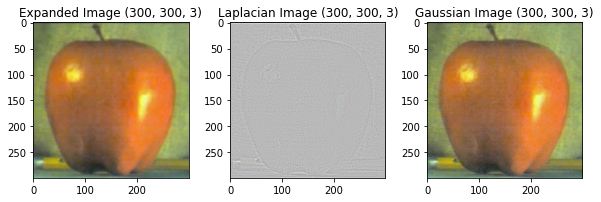

5090.168258238697 4.856733148983494e-08 0.17910589160453233


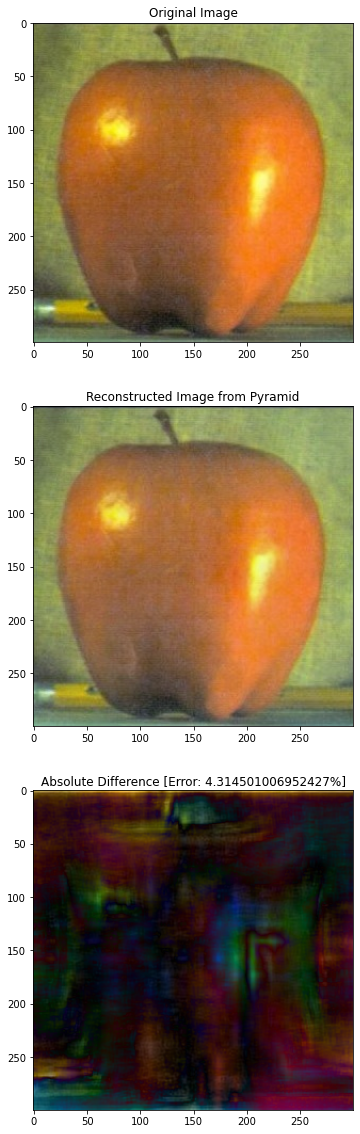

In [19]:
# Test to get back the original image
upPyr = collapsePyramid(G_pyr, L_pyr)
img_reconstruct = upPyr[len(upPyr)-1]
diff = cv2.absdiff(G_pyr[0],img_reconstruct)
error = (np.sum(diff)/np.sum(G_pyr[0])) * 100

print(np.sum(diff), np.amin(diff), np.amax(diff))

fig=plt.figure(figsize=(10, 20))
plt.subplot(3,1,1)
plt.imshow(G_pyr[0])
plt.title('Original Image')
plt.subplot(3,1,2)
plt.imshow(normalize(img_reconstruct))
plt.title('Reconstructed Image from Pyramid')
plt.subplot(3,1,3)
plt.imshow(normalize(diff))
plt.title('Absolute Difference [Error: '+str(error)+'%]')
plt.show()

In [21]:
A=cv2.imread('/content/apple.jpeg',1)
A=cv2.cvtColor(A,cv2.COLOR_BGR2RGB)
B=cv2.imread('/content/orange.jpeg',1)
B=cv2.cvtColor(B,cv2.COLOR_BGR2RGB)

A=A.astype('float64')/255
B=B.astype('float64')/255

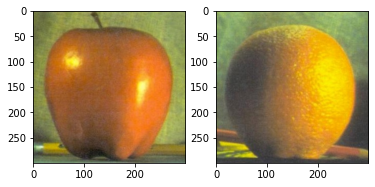

In [22]:
plt.subplot(1, 2, 1)
plt.imshow(A, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(B, cmap='gray')
plt.show()

In [24]:
#Make a mask that will act as the transition between the apple and orange image 
#by keeping one half of the image as 1 and the other half at zero.
M = np.zeros((A.shape[0], A.shape[1], 3)).astype('float64')
M[:,M.shape[0]//2:] = 1

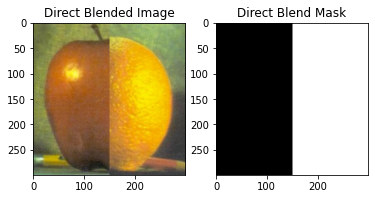

In [26]:
##Direct Blending
Img = (1 - M) * A + M * B

plt.subplot(1,2,1)
plt.imshow(Img)
plt.title('Direct Blended Image')
plt.subplot(1,2,2)
plt.imshow(M)
plt.title('Direct Blend Mask')
plt.show()

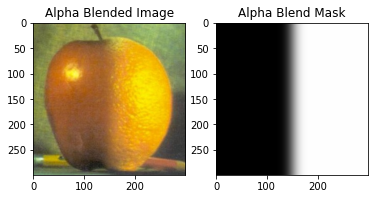

In [27]:
##Alpha Blending
M_blur = cv2.GaussianBlur(M, (75,75), 0)
# Blend Images using Alpha Blending mask
I_blur = (1 - M_blur) * A + M_blur * B

plt.subplot(1,2,1)
plt.imshow(I_blur)
plt.title('Alpha Blended Image')
plt.subplot(1,2,2)
plt.imshow(M_blur)
plt.title('Alpha Blend Mask')
plt.show()

In [31]:
##Multiresolution Blending

def multiblend(image1, image2):
    mask= np.zeros((image1.shape[0],image1.shape[1],3)).astype('float64')
    # Fill right half of mask with 1, leave left half 0
    mask[:,mask.shape[0]//2:] = 1
    
    # Create Gaussian Pyramid for Mask
    Gpyr_Mask, Lpyr_Mask = createPyramid(mask)
    # Create Laplacian Pyramids for Images
    Gpyr_I1, Lpyr_I1 = createPyramid(image1)
    Gpyr_I2, Lpyr_I2 = createPyramid(image2)
    
    # Create Laplacian Pyramid for blended image residuals
    l = len(Gpyr_Mask)
    LS_pyr = []
    for i in range(0,l):
        LS = (1 - Gpyr_Mask[i]) * Lpyr_I1[i] + Gpyr_Mask[i] * Lpyr_I2[i]
        LS_pyr.append(LS)
        
    # Perform blend at smallest resolution image   
    im = (1 - Gpyr_Mask[l-1]) * Gpyr_I1[l-1] + Gpyr_Mask[l-1] * Gpyr_I2[l-1]
    l = len(LS_pyr)
    # Store as 1 element list to send to collapsePyr
    GS_pyr = [im]
    # Create pyramid of upsampled blended images
    blnd_pyr = collapsePyramid(GS_pyr, LS_pyr)
    # Final blended image to return
    blendedimage = blnd_pyr[len(blnd_pyr)-1]

    return blendedimage

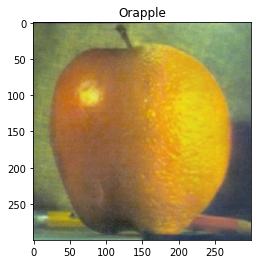

In [35]:
blnd_Img = multiblend(A,B)

plt.imshow(normalize(blnd_Img))
plt.title('Orapple')
plt.show()